<a href="https://colab.research.google.com/github/SecretCommander/Iris-Classification-GDGoC/blob/main/IRIS_GDGoC_Ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Load/Prepare**


In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install -q gdown

In [ ]:
#Baca dataset (IRIS Clasification)
#https://drive.google.com/file/d/1jRpHNDflDFvrqT_qa86R0tFUe3UVUFbF/view?usp=drive_link
!gdown 1jRpHNDflDFvrqT_qa86R0tFUe3UVUFbF
df = pd.read_csv('Iris.csv')

Downloading...
From: https://drive.google.com/uc?id=1jRpHNDflDFvrqT_qa86R0tFUe3UVUFbF
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 15.4MB/s]


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Data Preprocessing**

In [ ]:
# melihat baris dan kolom dari dataseetnya
df.shape

(150, 6)

In [ ]:
# Melihat informasi data terkait dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# melihat statistik dataframe
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# cek value yang null apakah ada atau tidak, kalo ada berapa banyak dan dikolom apa
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
# Tidak ada data yang hilang / Null
# Memeriksa apakah ada data duplicate, jika ada berapa banyak
print(df[df.duplicated()])

Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [ ]:
# Tidak ada duplicate value
# Menghapus kolom Id karena tidak digunakan dan tidak berguna sebagai feature
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Menghitung total data yang akan kita klasifikasi ( equally distibuted 50)
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


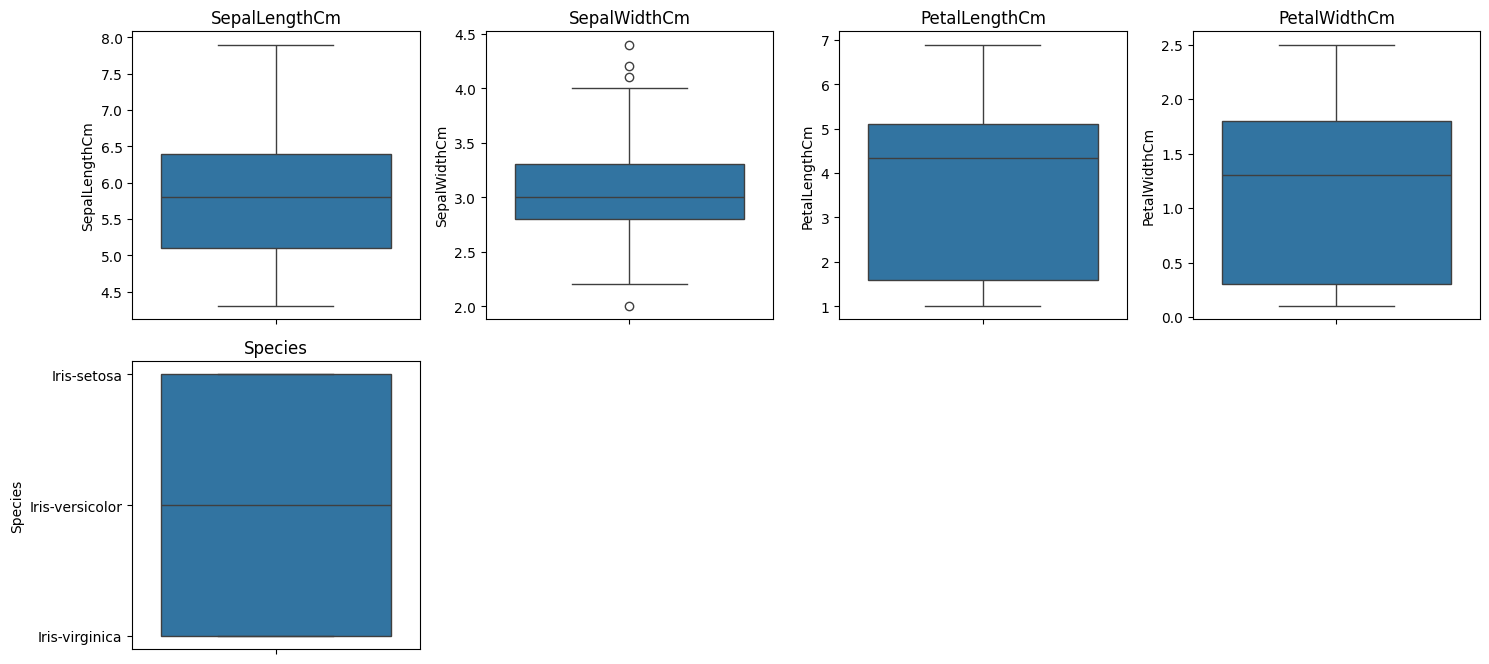

In [ ]:
# memvisualisasikan outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
## Desisi: Tidak mengelola outliers.
## Karena datanya relatif sikit dan sepertiny data outliers di SepalWidthCM bukan data error atau salah input (mungkin value nya benar-benar natural seperti itu sepalnya)

# **Data Exploratory**

In [ ]:
# Melakuakn Label Encoding pada data species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


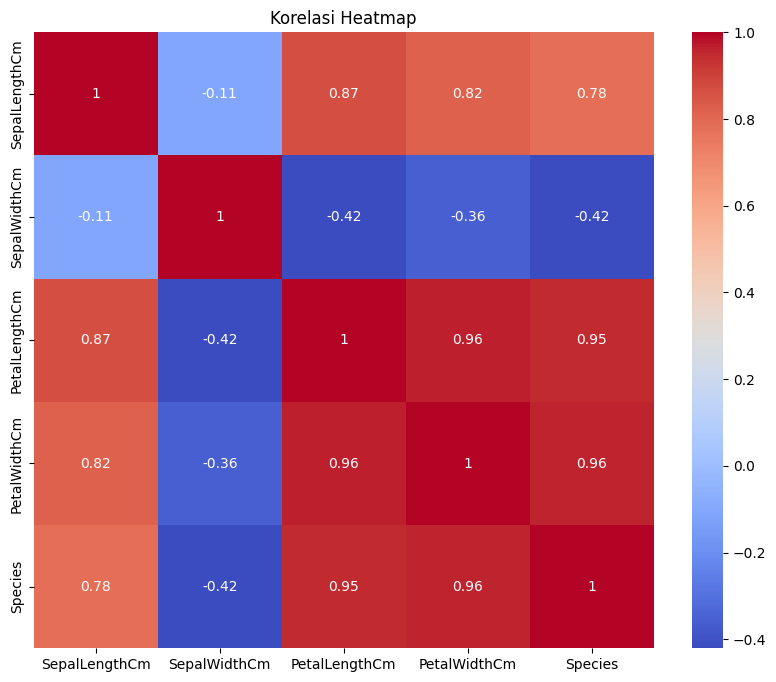

In [ ]:
# Melihat seberapa berpengaruh sebuah fitur trahadap fitur lain terutama pada target
# Menggunakan visualisasi korelasi heatmap.

# Membuat visualisasi korelasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Heatmap')
plt.show()

Korelasinya sangat besar pada Petal length dan width, dan hasilnya sedang pada sepal length, sedangkan sepal width tidak terlalu berkorelasi dengan hasil ataupun feature lain

/tmp/ipython-input-3221957160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Species", data=df, palette="bright")


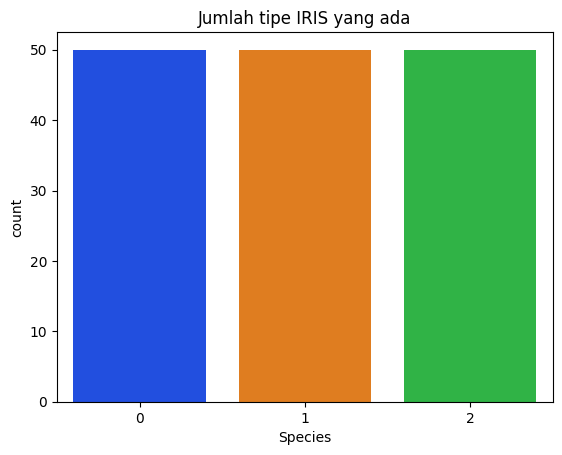

In [ ]:
# Membuat visualisasi bar chart pada jumlah data setiap species
sns.countplot(x="Species", data=df, palette="bright")
plt.title("Jumlah tipe IRIS yang ada")
plt.show()

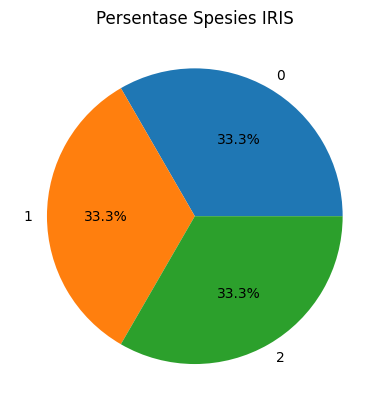

In [ ]:
# Membuat visualisasi bar chart pada jumlah data setiap species
plt.pie(df['Species'].value_counts(), labels=df['Species'].unique(), autopct='%1.1f%%')
plt.title('Persentase Spesies IRIS')
plt.show()

Bisa kita lihat di PIE dan BAR chart bahwa dataset IRIS classificationny itu equally distributed 30% sehingga kemungkinan bias itu sedikit

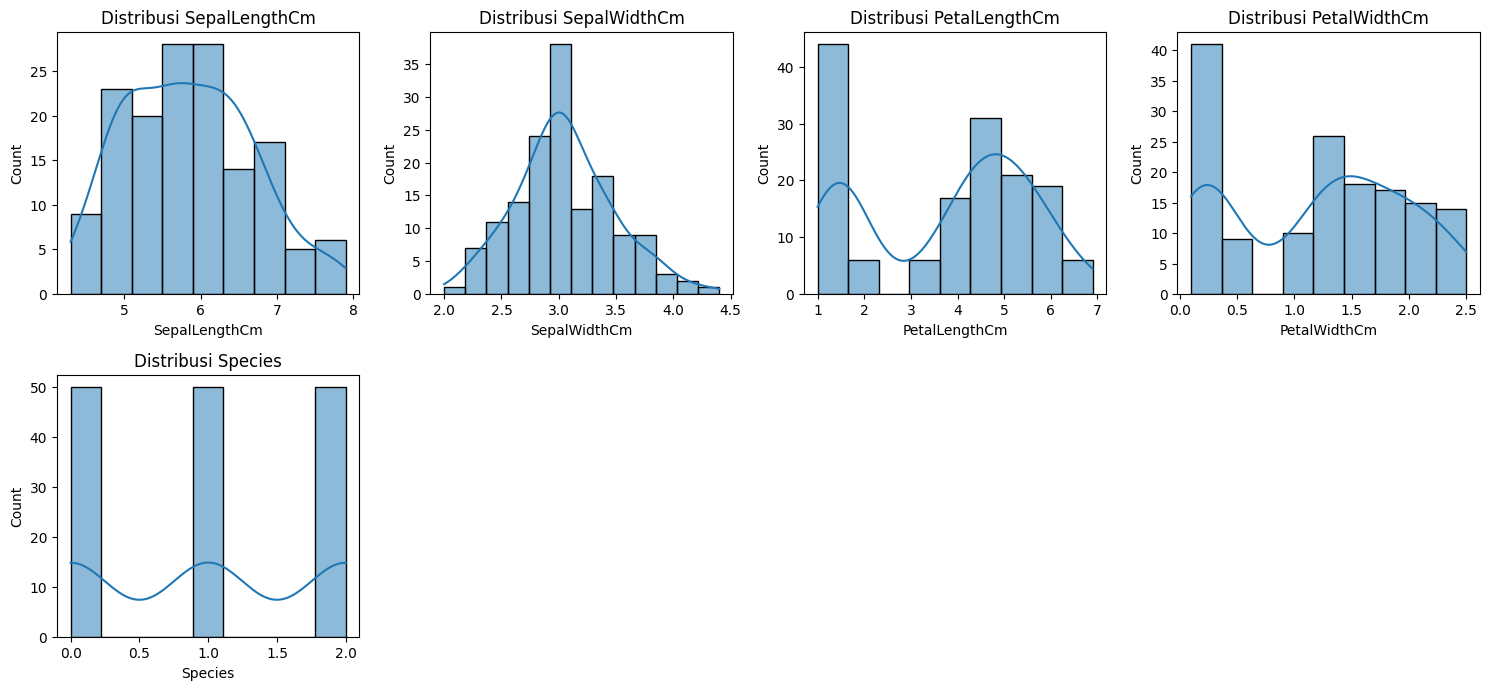

In [ ]:
# Membuat visualisasi distribusi kolom
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(x=df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

Dari grafik distribusi, beberapa fitur seperti SepalWidth punya bentuk distribusi yang cukup normal, artinya nilai-nilainya tersebar merata di sekitar rata-rata, Ini juga menjadi alasan kenapa fitur ini tidak terlalu berkorelasi dengan Spesies karena mungkin tiap spesies memiliki rata2 SepalWidth yang sama.

fitur SepalLength juga hampir mirip dengan SepalWidth tetapi puncak lebih melebar sehingga ini menghasilkan korelasi yang lumayan.

ada juga fitu yang punya dua puncak (bimodal) PetalLength dan juga PetalWidth, kemungkinan mencerminkan dua jenis data berbeda(Spesies) menjadi penentu perbedaan spesies yang lain dengan spesies IRIS lain(Korealasi Tinggi).

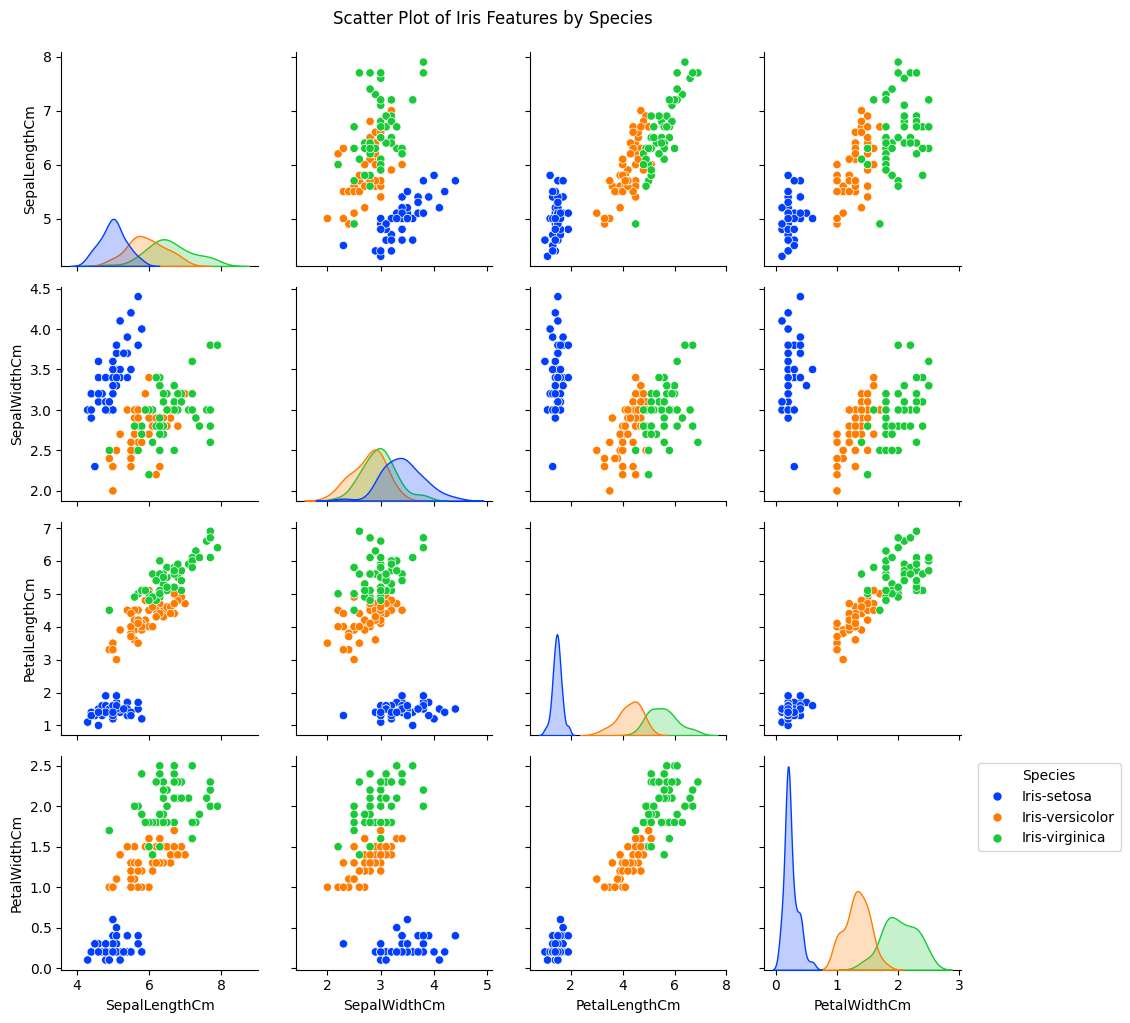

In [ ]:
# Membuat visualisasi Scatter Plot untuk mengetahui korelasi sama seperti heat map
# dan juga sebagai Pemisah dan mengetahui data species seperti apa
g = sns.PairGrid(df, hue='Species', palette='bright')

g.map_diag(sns.kdeplot, fill=True)
g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)

species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Membuat Scatter Plot
handles = [plt.Line2D([], [], marker='o', color=sns.color_palette('bright')[j], linestyle='None', markersize=5) for j in range(len(species_names))]

# Legend untuk warna
plt.legend(handles, species_names, title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.suptitle('Scatter Plot of Iris Features by Species', y=1.02)
plt.show()

Disini bisa kita liat korelasinya dalam bentuk scatterplot dan dapat dilihat bahwa IRIS setosa memiliki perbedaan yang drastis kebanding dengan IRIS yang lain. dan IRIS versicolar dan IRIS virgica berdekatan apalagi pada fitur sepalWisdt X SepalLength tetapi dapat dibedakan dengan fitur yang lain

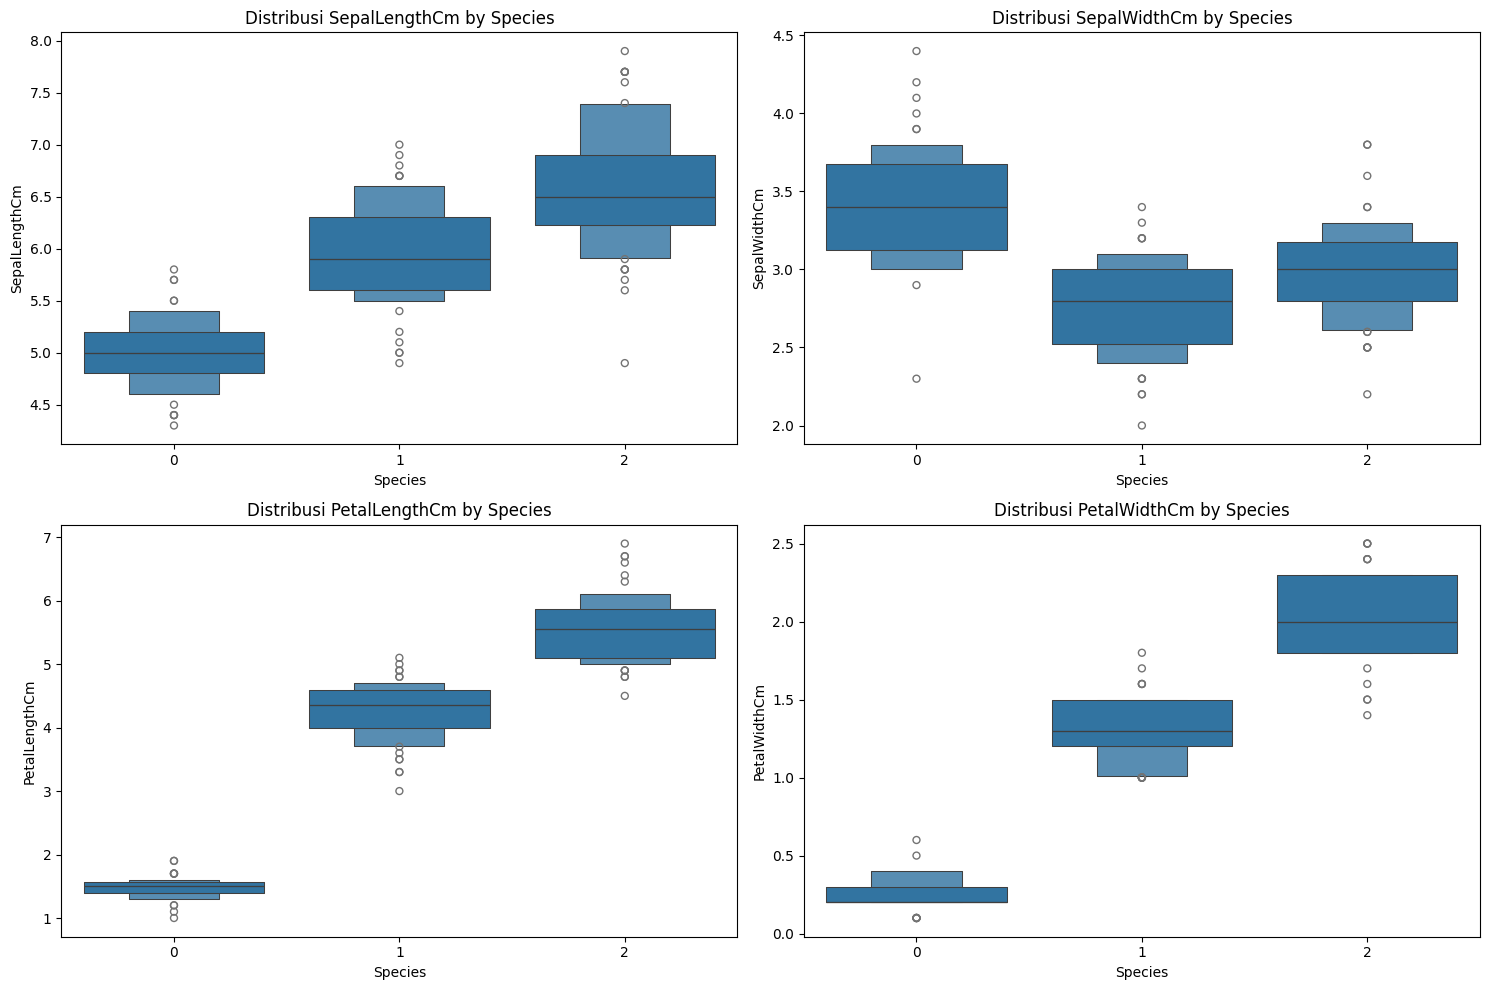

In [ ]:
# Membuat visualisasi boxen plot untuk setiap fitur berdasarkan spesies
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(x="Species", y=col, data=df)
    plt.title(f'Distribusi {col} by Species')
plt.tight_layout()
plt.show()

Boxplot yang membantu pembagian data untuk tiap fitur species agar mengetahui perbadaan dan feature yang mempengaruhi suatu spesies

# Modelling & Testing

In [ ]:
# Prepare datanya, Feature ke X, Target Menjadi Y
X = df.drop('Species', axis=1) # Features
y = df['Species'] # Target

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (150, 4)
Target shape: (150,)


In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


Karena datanya berdistribusi sama masing2 50 jadi tidak perlu melakukan SMOTE lagi

menggunakan beberapa model klasifikasi untuk modelling. Beberapa metode yang akan kita gunakan adalah:

- Decision Tree
- Random Forest
- K Nearest Neighbor
- Support Vector Machine (SVM)
- Logistic Regression

**Menggunakan Cross Validation untuk pengetesan Data karena datanya lumayan sedikit sekitar 150 instead of splitting data random jadi kita pakai Cross validation saja lalu mencari rata-rata dari cv nya**

In [ ]:
from sklearn.model_selection import cross_val_score
# Membuat MOdel Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# Cek Akurasi Model DecisionTree
scores_dt = cross_val_score(dt_model, X, y, cv=5)

print("Cross-validation scores:", scores_dt)
print("Average cross-validation score:", scores_dt.mean())

Cross-validation scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Average cross-validation score: 0.9666666666666668


In [ ]:
# Membuat Model Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

# Cek Akurasi Model RandomForest
scores_rf = cross_val_score(rf_model, X, y, cv=5)

print("Cross-validation scores:", scores_rf)
print("Average cross-validation score:", scores_rf.mean())

Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average cross-validation score: 0.9533333333333334


In [ ]:
# Membuat Model KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

# Cek Akurasi Model KNN
scores_knn = cross_val_score(knn_model, X, y, cv=5)

print("Cross-validation scores:", scores_knn)
print("Average cross-validation score:", scores_knn.mean())

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.9733333333333334


In [ ]:
# Membuat Model SVm
from sklearn.svm import SVC

svm_model = SVC()

# Cek Akurasi Model SVM
scores_svm = cross_val_score(svm_model, X, y, cv=5)

print("Cross-validation scores:", scores_svm)
print("Average cross-validation score:", scores_svm.mean())

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Average cross-validation score: 0.9666666666666666


In [ ]:
# Membuat Model Logical Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

# Cek Akurasi Model Logistic Regression
scores_lr = cross_val_score(lr_model, X, y, cv=5)

print("Cross-validation scores:", scores_lr)
print("Average cross-validation score:", scores_lr.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.9733333333333334


# **Evaluasi Model**

Melakukan evaluasi pada model-model yang telah kita buat, dan memilih model yang terbaik, mungkin untuk diproses lagi agar mencapai prediksi yang lebih baik lagi

In [ ]:
# Membandingkan nilai setiap model yang telah kita buat
all_score = [scores_dt.mean(), scores_rf.mean(), scores_knn.mean(), scores_svm.mean(), scores_lr.mean()]
use_model = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Logistic Regression']
for i in range(len(all_score)):
    print(use_model[i] +' : '+str(all_score[i]))

Decision Tree : 0.9666666666666668
Random Forest : 0.9533333333333334
KNN : 0.9733333333333334
SVM : 0.9666666666666666
Logistic Regression : 0.9733333333333334


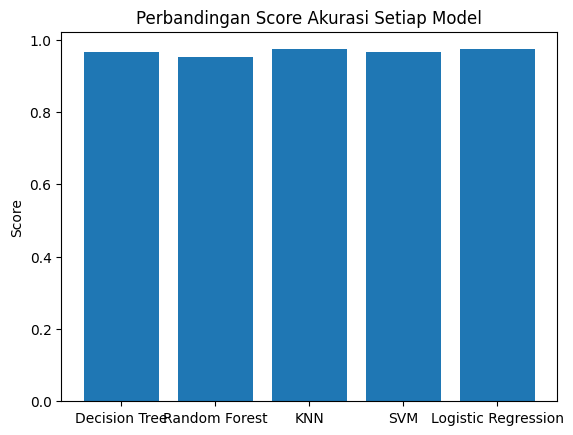

In [ ]:
# Visualisasi perbandingan score dari model model yang telah dibuat
plt.bar(use_model, all_score)
plt.ylabel('Score')
plt.title('Perbandingan Score Akurasi Setiap Model')
plt.show()

Dari sini kita tau kalo misalnya logistic regression dan KNN memiliki skore akurasi yang sama, karena memang kedua algoritma tersebut bagus buat classification, tapi saya lebih memilih logistic regression

**Saya tidak melakukan hyperparameter tuning pada model logistic regresionnya karena akurasi nya termasuk tinggi**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

lr_y_pred_cv = cross_val_predict(lr_model, X, y, cv=5)

# menampilkan classifcation report pada model logistic regression
print("\nClassification Report Logistic Regression (Cross-Validation):")
print(classification_report(y, lr_y_pred_cv))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report Logistic Regression (Cross-Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



# **Implementation**

In [ ]:
# Melakukan Implementasi menggunakan Fast API
# Load model menggunakan pickle
lr_model.fit(X, y)
import pickle
pickle.dump(lr_model, open('Irismodel.pkl', 'wb'))